### Telecom_Customer_Churn

This is a Customer churn dataset. Customer Churn is when an existing customer stops doing business with a company. Here are the columns for the dataset:

**Features:**

<ul>
<li>Account_Length</li>             <li>Vmail_Message</li>
<li>Day_Mins</li>                   <li>Eve_Mins</li>
<li>Night_Mins</li>                 <li>Intl_Mins</li>
<li> CustServ_Calls</li>	        <li>Intl_Plan</li>
<li>Vmail_Plan</li>                 <li>Day_Calls</li>
<li>Day_Charge</li>	                <li>Eve_Calls</li>
<li>Eve_Charge</li>	                <li>Night_Calls</li>
<li>Night_Charge</li>	            <li>Intl_Calls</li>
<li>Intl_Charge</li>	            <li>State</li>
<li>Area_Code</li>	                <li>Phone</li>
</ul>
 
**Target variable:**
 
 - Churn
 
**Objectives:**
 
Our goal is using Decision Tree classifier we can predict customer churn their cellular plan at a given point in time.

**Reference of this dataset:** https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python


### Import Libraries

In [1]:
import pandas as pd
import numpy as np


pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
df = pd.read_csv("Churn.csv")

display(df.head())
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


(3333, 21)


### Data Preprocessing

### Check data types and missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

**Observation:**
Initially,we can observe that there has no missing values. 
- Account_Length, Vmail_Message, CustServ_Calls, Day_Calls, Eve_Calls, Night_Calls, Intl_Calls and Area_Code are integer values.
- Day_Mins, Eve_Mins, Night_Mins, Intl_Mins, Day_Charge, Eve_Charge, Night_Charge and Intl_Charge are float values.
- Churn, Intl_Plan, Vmail_Plan, State and Phone are categorical and object values.

For our prediction, ['State','Area_Code, Phone'] are not effective columns than other columns. So, we can drop them.

In [4]:
df = df.drop(['State','Area_Code','Phone'],axis=1)

In [5]:
#df['Churn'].value_counts()
#df['Intl_Plan'].value_counts()
#df['Vmail_Plan'].value_counts()

### Label Encoding or One-hot Encoding

- Label Encoding is an encoding technique for handling categorical variables. Here, each label is assigned a unique integer based on alphabetical ordering. 
- On the otherside, One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. 

Here, label encoding is performed to do ranking each label of variables alphabetically which can misinterpret to machine.
For my analysis, I would prefer one-hot encoding. And for overcoming the multicollinearity, we can drop the first additional feature of each label.

In [6]:
df['Churn'] = df['Churn'].replace({'no':0, 'yes':1})
df['Intl_Plan'] = df['Intl_Plan'].replace({'no':0, 'yes':1})
df['Vmail_Plan'] = df['Vmail_Plan'].replace({'no':0, 'yes':1})
display(df.shape)
display(df.head())
display(df.info())

(3333, 18)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

None

### One-Hot Encoding

In [7]:
#df = pd.get_dummies(df)
#display(df.head())
#print(df.shape)

### Data Transformation (StandardScaler or MinMaxScaler)

**Does Data Transformation improve model performance? Is it necessary to standardize or normalize data for tree-based machine learning models?**

- Data transformation is an important part of feature scaling of Data Preprocessing. The goal of applying Feature Scaling is to make sure features are on almost the same scale so that each feature is equally important and make it easier to process by most ML algorithms.

- Tree-based machine learning  modelsi.e., decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features. 

So, standardization or normalization is not required for Tree-based machine learning models.

### Features and target variable 

In [8]:
X = df.drop('Churn',axis=1)
y= df[['Churn']]
print(X.shape, y.shape)

(3333, 17) (3333, 1)


### Train-Test Split

In [9]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 17) (667, 17) (2666, 1) (667, 1)


###  Grid Search and Cross-Validation with Decision Tree Classifier

In [10]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)

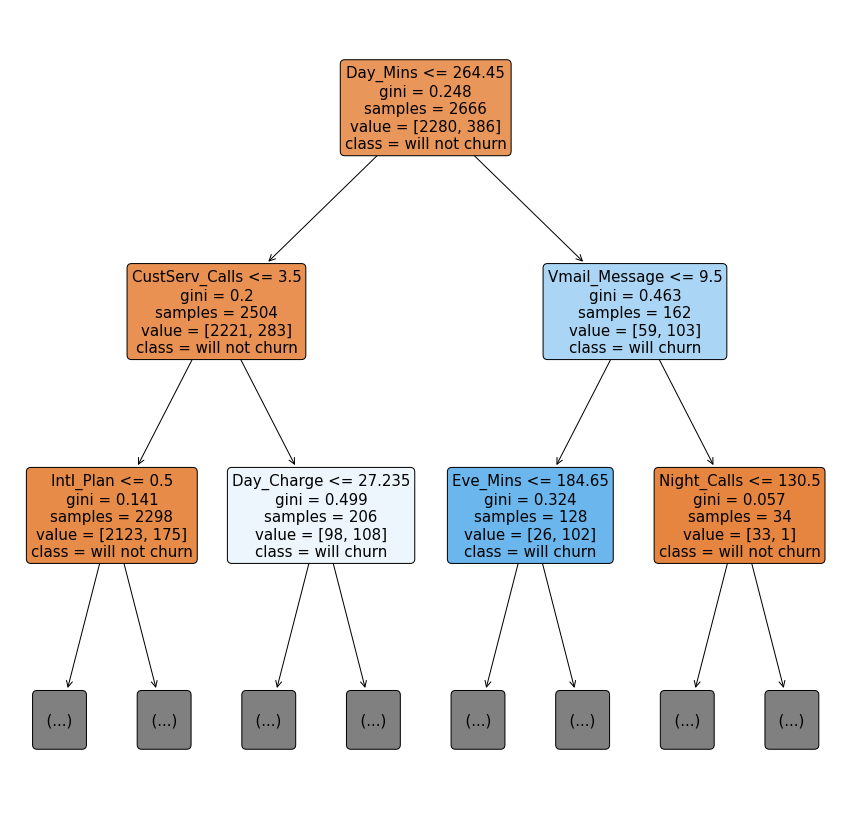

In [11]:
plt.figure(figsize = (15, 15))

plot_tree(model_DT, 
          filled=True,
          rounded=True,
          class_names = ["will not churn", "will churn"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

In [12]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

grid_search = GridSearchCV(estimator=model_DT,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

**Hyperparameters for grid search in each iteration:**

- iteration 1: criterion='gini', max_depth=3
- iteration 2: criterion='gini', max_depth=4
- iteration 3: criterion='gini', max_depth=5
- iteration 4: criterion='gini', max_depth=6
- iteration 5: criterion='gini', max_depth=7
- iteration 6: criterion='entropy', max_depth=3
- iteration 7: criterion='entropy', max_depth=4
- iteration 8: criterion='entropy', max_depth=5
- iteration 9: criterion='entropy', max_depth=6
- iteration 10: criterion='entropy', max_depth=7

### Prediction

In [13]:
y_pred = np.round(grid_result.predict(X_test), 2)

### Best hyperparameters in the grid search

In [14]:
grid_result.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [15]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,gini,6,0.943820,0.951220,0.954972,0.949343,0.947467,0.949364,0.003721,1
9,entropy,7,0.945693,0.941839,0.958724,0.951220,0.943715,0.948238,0.006111,2
8,entropy,6,0.943820,0.934334,0.958724,0.949343,0.943715,0.945987,0.007989,3
4,gini,7,0.936330,0.945591,0.958724,0.949343,0.938086,0.945615,0.008107,4
2,gini,5,0.930712,0.943715,0.947467,0.953096,0.938086,0.942615,0.007705,5
7,entropy,5,0.934457,0.938086,0.951220,0.945591,0.939962,0.941863,0.005902,6
1,gini,4,0.923221,0.932458,0.924953,0.930582,0.917448,0.925732,0.005372,7
6,entropy,4,0.923221,0.926829,0.924953,0.932458,0.917448,0.924982,0.004882,8
0,gini,3,0.898876,0.919325,0.904315,0.904315,0.904315,0.906229,0.006878,9
5,entropy,3,0.898876,0.881801,0.904315,0.906191,0.904315,0.899100,0.008989,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


### Model performance evaluation with the best found model in grid search and cross-validation

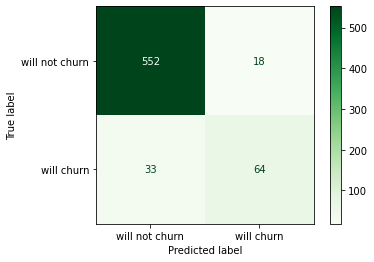

In [16]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["will not churn", "will churn"],
                      cmap='Greens')
plt.show()

In [17]:
confusion_matrix_DT = confusion_matrix(y_test['Churn'], y_pred)
print('confusion_matrix: \n', confusion_matrix_DT)

confusion_matrix: 
 [[552  18]
 [ 33  64]]


In [21]:
#accuracy = np.round(accuracy_score(y_test['Churn'], y_pred), 2)

#precision = np.round(precision_score(y_test['Churn'], y_pred), 2)

#recall = np.round(recall_score(y_test['Churn'], y_pred), 2)
                                
#f1_score = np.round(f1_score(y_test['Churn'], y_pred), 2) 
                               
#print('Accuracy: ', accuracy)
#print("Precision = ", precision)
#print("Recall = ", recall)
#print("f1 score = ", f1_score)

### Classification report

In [19]:
print(classification_report(y_test['Churn'], y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       570
           1       0.78      0.66      0.72        97

    accuracy                           0.92       667
   macro avg       0.86      0.81      0.84       667
weighted avg       0.92      0.92      0.92       667



**Observations:**

The classification report shows a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.

**Accuracy:** Here the  model accuracy is 92%, which means the model is performing very well on the test dataset.

**Precision:** It measures the classifier's exactness. Here, 64 people (will churn) are correctly predicted from the all positive predicted values(64+18=82 people).

**Recall:**  It measures the classifier's completeness. Here, 64 people (will churn) are correctly classified from the all actual values (64+33= 97).

### ROC-AUC

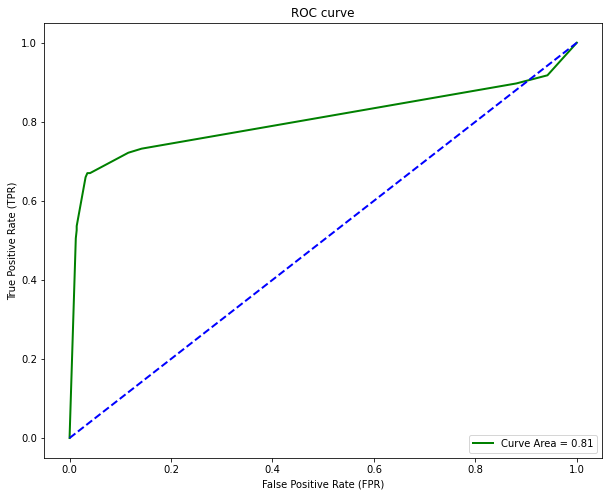

In [20]:
fpr, tpr, thr = roc_curve(y_test['Churn'], grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test['Churn'], y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()